<br>
<font color=blue  size=6 face="微軟正黑體">期末專案報告</font> 
<br>
<br>
<font color="#000080"  size=4 face="微軟正黑體">組員 : 胡嘉展(Joser Hu) </font>  
<br>
<font color="#000080"  size=4 face="微軟正黑體">主題 : 應用深度學習來識別蔬果</font> 

<br>
<font color="#000080"  size=5 face="微軟正黑體"> 介紹 :</font>  
<br>
<font color="#000080" size=3 face="微軟正黑體"> 
使用卷積神經網路CNN識別蔬果圖像，內容包括 : 蘋果，梨，香蕉，仙人掌果，哈密瓜，櫻桃，萊姆，番茄，葡萄，葡萄柚，番石榴，榛子，桃，柿子，大頭菜，檸檬，荔枝，柑，芒果，芒果，甜瓜，桑樹，橙，木瓜，百香果，桃，鳳梨，辣椒，菠蘿，石榴，柚子蜜，木瓜，紅毛丹，覆盆子，紅醋栗，草莓.....
</font> 

<br>
<font color="#000080"  size=5 face="微軟正黑體"> 實作方法 : </font>
<br>
<font color="#000080"  size=3 face="微軟正黑體"> 使用卷積神經網路CNN(Convolutional neural network)訓練流程</font>  
<img src="CNN_1.png" alt="drawing" style="width: 800px;"/>

<br>
<font color=Red size=3 face="微軟正黑體">[輸入]</font>
<br>
* 圖像大小：100x100 Pixel
* 訓練圖像數量: 53,177
* 測試圖像數量: 17,845

<br>
<font color=Red size=3 face="微軟正黑體"> [輸出]</font>
<br>
* 可分辨蔬果分類數量：103 種水果
* 識別圖像來源 : 經由水果測試圖像進行預測識別出水果種類。

<br>
<font color=Red size=3 face="微軟正黑體">[訓練資料結構]</font>
<br>
1. 建立101種 "英文水果名稱" 目錄，按照英文字母由a~z排列出順序，大約 (0~100) 個目錄。
2. 標註Label (y_train)   : 水果目錄順序碼
3. 特徵Feature (x_train) : 水果目錄下圖像檔

<font color="#000080"  size=5 face="微軟正黑體"> 專案排程與步驟 :</font>  
<img src="CNN_3.png" alt="drawing" style="width: 800px;"/>

<font color=blue  size=5 face="微軟正黑體" > 1. 資料收集 </font> 
<font color="#000080" size=3 face="微軟正黑體"  > 開始構建CNN，對fruits數據集進行多類分類，共有71,125個圖像，分為兩個文件夾 :  </font>
1. 訓練集 : 53,177 筆圖像
2. 測試集 : 17,845 筆圖像

<font color=blue  size=5 face="微軟正黑體" > 2. 資料預處理(Preprocess) </font> 
<br>
<font color="#000080"  size=3 face="微軟正黑體" > 2.1 將圖片資料依水果分類(特徵Feature)及建立分類水果真實名稱為目錄(標註Label) </font> 

In [1]:
# 將圖片檔名及目標標籤載到numpy數組陣列中！
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_files

import numpy as np

train_dir = './fruits-360_103/Training'
test_dir = './fruits-360_103/Test'


def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

# Training fruit image :x_train 
# Training label id :y_train
x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,test_labels = load_dataset(test_dir)
print('Loaded !')

print('Training set qty : ' , x_train.shape[0])  
print('Testing set qty : ', x_test.shape[0])      

Loaded !
Training set qty :  53177
Testing set qty :  17845


In [2]:
# 檢視圖像檔案及標籤 
x_train, y_train

(array(['./fruits-360_103/Training\\Pear Red\\r_260_100.jpg',
        './fruits-360_103/Training\\Raspberry\\r_171_100.jpg',
        './fruits-360_103/Training\\Mangostan\\r_132_100.jpg', ...,
        './fruits-360_103/Training\\Plum 3\\r3_42_100.jpg',
        './fruits-360_103/Training\\Pomelo Sweetie\\r2_130_100.jpg',
        './fruits-360_103/Training\\Apple Granny Smith\\r_177_100.jpg'],
       dtype='<U59'), array([70, 88, 55, ..., 83, 85,  5]))

In [3]:
# 確認水果種類數量
num_categories = len(np.unique(y_train))
num_categories

103

In [4]:
# 更改為103個單位向量
print(y_train[0:10])

[70 88 55 97 13 15 80 64 20 81]


In [5]:
from keras.models import model_from_json
from keras.utils import np_utils
# CNN 輸出層的每筆 Data 都是一維陣列
# 所以, 需將 Train & Test Label 資料轉換為 One-Hot Encoding 
new_y_train = np_utils.to_categorical(y_train,num_categories) # 將類向量（整數）轉換為二進制類矩陣 one hot encoding
new_y_test = np_utils.to_categorical(y_test,num_categories)
new_y_train[0] 


Using TensorFlow backend.


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.], dtype=float32)

In [6]:
new_y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<font color="#000080"  size=3 face="微軟正黑體" > 2.2 將資料集劃分為測試和驗證集 </font> 

In [7]:
# 將全測試集圖像資料，劃分測試集和驗證集，前7000個為測試集，7000以後為數據集
x_test,x_valid = x_test[7000:],x_test[:7000] # 7000筆以後為驗證集圖像，前7000筆為測試圖像
new_y_test,new_y_valid = new_y_test[7000:],new_y_test[:7000] # 7000筆以後為驗證集標籤，前7000筆為測試標籤
print('Vaildation X : ',x_valid.shape)
print('Vaildation y :',new_y_valid.shape)
print('Test X : ',x_test.shape)
print('Test y : ',new_y_test.shape)

Vaildation X :  (7000,)
Vaildation y : (7000, 103)
Test X :  (10845,)
Test y :  (10845, 103)


<font color="#000080"  size=3 face="微軟正黑體" > 2.3 將像素轉換為數據矩陣</font> 

In [8]:
# 將圖像載入和轉入陣列內
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))   
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Training data shape : ',x_train.shape)

x_valid = np.array(convert_image_to_array(x_valid))
print('Validation data shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test data shape : ',x_test.shape)

print('1st training image shape ',x_train[0].shape)

Training data shape :  (53177, 100, 100, 3)
Validation data shape :  (7000, 100, 100, 3)
Test data shape :  (10845, 100, 100, 3)
1st training image shape  (100, 100, 3)


In [9]:
print('1st training image as array',x_train[0]) 

1st training image as array [[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [254. 255. 251.]
  [255. 255. 255.]
  [255. 251. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [252. 255. 253.]
  [255. 255. 255.]
  [255. 252. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [251. 255. 255.]
  [253. 254. 255.]
  [255. 254. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [10]:
# 將資料正規劃化至  [0,1] 
new_x_train = x_train.astype('float32')/255
new_x_valid = x_valid.astype('float32')/255
new_x_test = x_test.astype('float32')/255

In [11]:
# 檢查一下
new_x_train.min(), new_x_train.max()

(0.0, 1.0)

In [12]:
import matplotlib.pyplot as plt # Data visulation
plt.imshow(new_x_train[0])

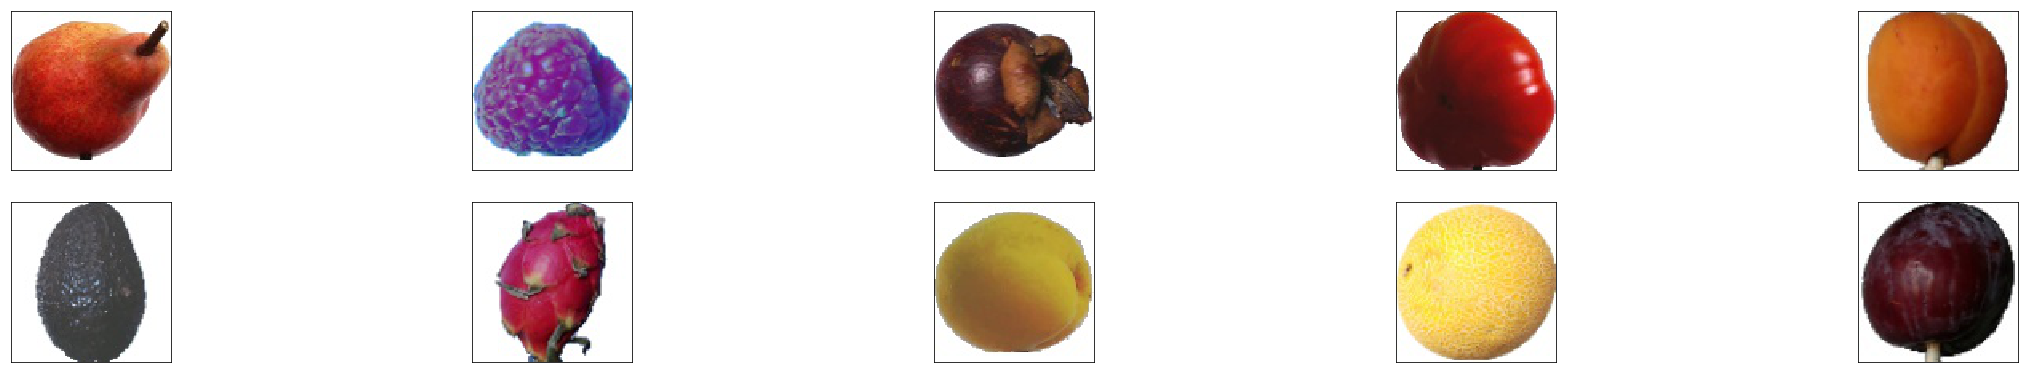

In [13]:
# 可視化前10個訓練圖像！
import matplotlib.pyplot as plt  # Data visulation

fig = plt.figure(figsize =(40,10))
for i in range(10):
    ax = fig.add_subplot(3,5,i+1,xticks=[],yticks=[]) # (nrows, ncols, index, **kwargs) kwargs: xticks->list yticks->list only
    ax.imshow(np.squeeze(new_x_train[i]))  
    

<font color=blue  size=5 face="微軟正黑體" > 3. 建立模型 </font> 
* 建立CNN 模型，輸入水果圖像，透過卷積層、池化層、提取圖像特徵，再以完全連結神經網路，包括平坦層、隱藏層、輸出層，組成神經網路
* 研讀並選擇合適的Loss functions

<font color="#000080"  size=3 face="微軟正黑體" > 3.1 訓練模型(一) </font> 

In [18]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = 2
resnet_weights_path = './resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
my_new_model.add(Dense(num_categories, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

In [19]:
my_new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_2 (Dense)              (None, 103)               211047    
Total params: 23,798,759
Trainable params: 211,047
Non-trainable params: 23,587,712
_________________________________________________________________


In [20]:
# 設定模型的訓練方式 (一)
# optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
optimizer = 'sgd'
my_new_model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

# binary_crossentropy
# categorical_crossentropy

In [21]:
# 定義訓練參數，訓練的歷史記錄, 會回傳到指定變數 history
# batch_size : 100
# epochs : 10
history = my_new_model.fit(new_x_train,new_y_train, batch_size = 100, epochs=1, validation_data=(new_x_valid, new_y_valid),verbose=2, shuffle=True)     

Train on 53177 samples, validate on 7000 samples
Epoch 1/1
 - 8586s - loss: nan - acc: 0.0093 - val_loss: nan - val_acc: 0.0090


<font color="#000080"  size=3 face="微軟正黑體" > 設定模型的訓練方式 : </font> 
<br>
* 設定 Loss 損失函數為 categorical_crossentropy
* 設定 Optimizer 最佳化方法為 adam or rmsprop    
* 設定 Model 評估準確率方法為 accuracy

<font color=blue  size=5 face="微軟正黑體" > 4. 訓練模型 </font> 

<font color="#000080"  size=3 face="微軟正黑體" > 提升準確率方式有 : </font> 
<br>
* 可再執行這個函數,進行重覆訓練
* 增加 卷積層 filter 數
* 增加 隱藏層 units 神經元數
* 增加 隱藏層 layer
* 更換訓練神經網路<br>

<font color="#000080"  size=3 face="微軟正黑體" > 訓練說明 : </font> 
<br>
* 模型的保存及重用
* 每次訓練結束後回調比對，並保存最好的模型於hdf5。
* 輸入訓練資料，Feature 水果圖像特徵值與Label水果真實名稱
* 執行10次訓練週期，每一批次100筆資料

In [ ]:
# 將模型儲存至 HDF5 檔案中
# my_new_model.save("./fruits-360_103/fruits_mode41.hdf5")  # creates a HDF5 file 

<font color=black  size=3 face="微軟正黑體" > 使用訓練完成模型，輸入資料進行預測，逐次顯示訓練結果 </font> 
<br>
<font color=black  size=2 face="微軟正黑體" >
. loss:     使用訓練資料, 得到的損失函數誤差值 (值越小, 代表準確率越高)<br>
. acc:      使用訓練資料, 得到的評估準確率     (值在 0~1, 值越大, 代表準確率越高)<br>
. val_loss: 使用驗證資料, 得到的損失函數誤差值 (值越小, 代表準確率越高)<br>
. val_acc:  使用驗證資料, 得到的評估準確率     (值在 0~1, 值越大, 代表準確率越高)</font> 

In [ ]:
# 從 HDF5 檔案中載入模型，必須再執行一次 compile
# my_new_model = load_model ("./fruits-360_103/fruits_mode41.hdf5")
# print("CNN model loaded !")

<font color=blue  size=5 face="微軟正黑體" > 5. 評估模型準確率 </font> 

In [23]:
# 估計準確度 損失和準確率
score = my_new_model.evaluate(new_x_test, new_y_test, verbose=0)
# 輸出結果
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: nan
Test accuracy: 0.009313047487321346


<font color=blue  size=5 face="微軟正黑體" > 6. 進行預測 </font> 
<br>
<font color="#000080"  size=3 face="微軟正黑體" > 使用訓練完成模型，輸入資料進行預測 </font> 
<br>
<font color="#000080"  size=3 face="微軟正黑體" > 可視化測試預測結果, 隨機抽取測試圖像樣本，並預測標籤和標註數據(ground truth) </font> 

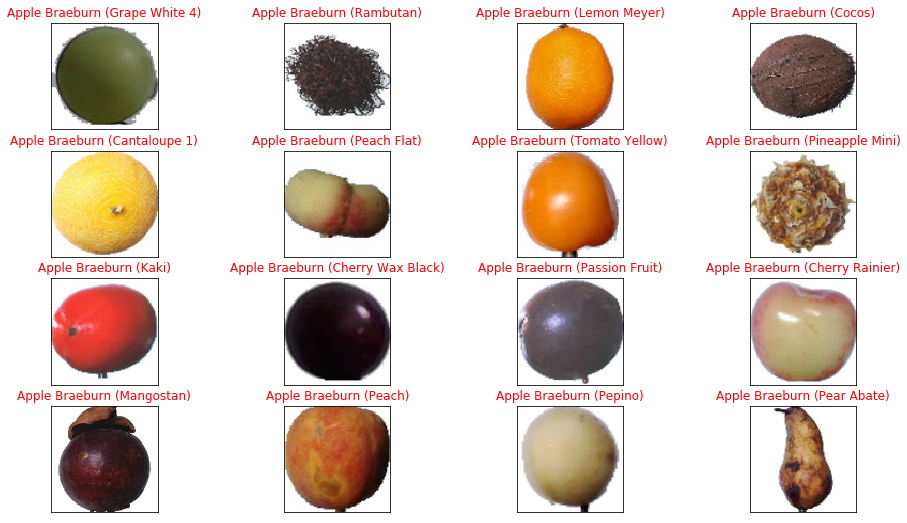

In [25]:
# 可視化測試預測結果
new_y_pred = my_new_model.predict(new_x_test)
# 隨機抽取測試圖像樣本，並預測標籤和標註數據(ground truth)
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(new_x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(new_x_test[idx]))
    pred_idx = np.argmax(new_y_pred[idx])
    true_idx = np.argmax(new_y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

<font color=blue  size=5 face="微軟正黑體" > 7. 結果報告 </font> 
<br>
<font color="#000080"  size=3 face="微軟正黑體" > 7.1 檢視損失和準確性結果 </font> 

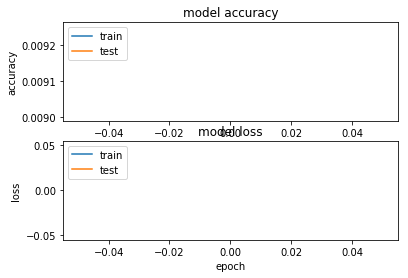

In [26]:
# 檢視損失率和精準度
import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # 準確度結果  
   
plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # 損失率結果   
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

<font color="#000080"  size=3 face="微軟正黑體" > 7.2 模糊矩陣 (Confusion Matrix) </font> 

In [27]:
import pandas as pd

y_pred = my_new_model.predict(new_x_test, batch_size=None, verbose=0, steps=None).argmax(axis=-1)
res_crosstab = pd.crosstab(y_pred, y_test[7000:])

dict_idx_fruit = {idx: label for idx, label in enumerate(test_labels)}
print(dict_idx_fruit)

res_crosstab


{0: 'Apple Braeburn', 1: 'Apple Crimson Snow', 2: 'Apple Golden 1', 3: 'Apple Golden 2', 4: 'Apple Golden 3', 5: 'Apple Granny Smith', 6: 'Apple Pink Lady', 7: 'Apple Red 1', 8: 'Apple Red 2', 9: 'Apple Red 3', 10: 'Apple Red Delicious', 11: 'Apple Red Yellow 1', 12: 'Apple Red Yellow 2', 13: 'Apricot', 14: 'Avocado', 15: 'Avocado ripe', 16: 'Banana', 17: 'Banana Lady Finger', 18: 'Banana Red', 19: 'Cactus fruit', 20: 'Cantaloupe 1', 21: 'Cantaloupe 2', 22: 'Carambula', 23: 'Cherry 1', 24: 'Cherry 2', 25: 'Cherry Rainier', 26: 'Cherry Wax Black', 27: 'Cherry Wax Red', 28: 'Cherry Wax Yellow', 29: 'Chestnut', 30: 'Clementine', 31: 'Cocos', 32: 'Dates', 33: 'Granadilla', 34: 'Grape Blue', 35: 'Grape Pink', 36: 'Grape White', 37: 'Grape White 2', 38: 'Grape White 3', 39: 'Grape White 4', 40: 'Grapefruit Pink', 41: 'Grapefruit White', 42: 'Guava', 43: 'Hazelnut', 44: 'Huckleberry', 45: 'Kaki', 46: 'Kiwi', 47: 'Kohlrabi', 48: 'Kumquats', 49: 'Lemon', 50: 'Lemon Meyer', 51: 'Limes', 52: 'Lyc

col_0,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
row_0,,,,,,,,,,,,,,,,,,,,,
0,101,84,99,96,108,110,99,96,103,81,...,110,91,144,154,146,88,98,77,95,148


<font color="#000080"  size=3 face="微軟正黑體" > 7.3 檢查各種最差精度 (Low Accuracy) </font> 

In [28]:
for idx in range(num_categories):
    accuracy = res_crosstab.loc[idx, idx] / res_crosstab.loc[:, idx].sum()
    flag = '***LOW***' if accuracy < 0.75 else ''
    print(dict_idx_fruit[idx])
    print('   ', flag, 'accuracy –', round(accuracy * 100, 2), '%')

Apple Braeburn
     accuracy – 100.0 %


KeyError: 'the label [1] is not in the [index]'

<font color="#000080"  size=3 face="微軟正黑體" > 7.4 模型中問題點 </font> 

In [29]:
for idx in range(35):
    for idx2 in range(35):
        accuracy = res_crosstab.loc[idx, idx] / res_crosstab.loc[:, idx].sum()
        if idx != idx2 and res_crosstab.loc[idx, idx2] != 0:
            pred_fruit = dict_idx_fruit[idx]
            actual_fruit = dict_idx_fruit[idx2]
            num_mistakes = res_crosstab.loc[idx, idx2]
            sing_or_plural = 's' if num_mistakes > 1 else ''
            print('- {} {}{} mistaken for {}{}'.format(num_mistakes, actual_fruit, sing_or_plural, pred_fruit, sing_or_plural))

- 84 Apple Crimson Snows mistaken for Apple Braeburns
- 99 Apple Golden 1s mistaken for Apple Braeburns
- 96 Apple Golden 2s mistaken for Apple Braeburns
- 108 Apple Golden 3s mistaken for Apple Braeburns
- 110 Apple Granny Smiths mistaken for Apple Braeburns
- 99 Apple Pink Ladys mistaken for Apple Braeburns
- 96 Apple Red 1s mistaken for Apple Braeburns
- 103 Apple Red 2s mistaken for Apple Braeburns
- 81 Apple Red 3s mistaken for Apple Braeburns
- 114 Apple Red Deliciouss mistaken for Apple Braeburns
- 99 Apple Red Yellow 1s mistaken for Apple Braeburns
- 124 Apple Red Yellow 2s mistaken for Apple Braeburns
- 97 Apricots mistaken for Apple Braeburns
- 97 Avocados mistaken for Apple Braeburns
- 98 Avocado ripes mistaken for Apple Braeburns
- 109 Bananas mistaken for Apple Braeburns
- 98 Banana Lady Fingers mistaken for Apple Braeburns
- 98 Banana Reds mistaken for Apple Braeburns
- 102 Cactus fruits mistaken for Apple Braeburns
- 109 Cantaloupe 1s mistaken for Apple Braeburns
- 103 C

KeyError: 'the label [1] is not in the [index]'